## Initialization


In this project, we'll build a simple application to explore some properties of a used car dataset.

In [637]:
#Import libraries
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt 
import seaborn as sns
from scipy import stats

## Load data

In [638]:
#load our data 
df = pd.read_csv('../vehicles_us.csv')
df.head()

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28

## Prepare the data

In [639]:
# Basic exploration of the dataset
df.info() #looking at general contents of table
display(df) #closer loot at the data
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


price  model_year           model  condition  cylinders fuel  odometer  \
0       9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1      25500         NaN      ford f-150       good        6.0  gas   88705.0   
2       5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3       1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4      14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
...      ...         ...             ...        ...        ...  ...       ...   
51520   9249      2013.0   nissan maxima   like new        6.0  gas   88136.0   
51521   2700      2002.0     honda civic    salvage        4.0  gas  181500.0   
51522   3950      2009.0  hyundai sonata  excellent        4.0  gas  128000.0   
51523   7455      2013.0  toyota corolla       good        4.0  gas  139573.0   
51524   6300      2014.0   nissan altima       good        4.0  gas       NaN   

      transmission    type paint_color  is_4wd date_posted  days_listed  
0        automatic     SUV         NaN     1.0  2018-06-23           19  
1        automatic  pickup       white     1.0  2018-10-19           50  
2        automatic   sedan         red     NaN  2019-02-07           79  
3        automatic  pickup         NaN     NaN  2019-03-22            9  
4        automatic   sedan       black     NaN  2019-04-02           28  
...            ...     ...         ...     ...         ...          ...  
51520    automatic   sedan       black     NaN  2018-10-03           37  
51521    automatic   sedan       white     NaN  2018-11-14           22  
51522    automatic   sedan        blue     NaN  2018-11-15           32  
51523    automatic   sedan       black     NaN  2018-07-02           71  
51524    automatic   sedan         NaN     NaN  2018-06-05           10  

[51525 rows x 13 columns]

price    model_year     cylinders       odometer   is_4wd  \
count   51525.000000  47906.000000  46265.000000   43633.000000  25572.0   
mean    12132.464920   2009.750470      6.125235  115553.461738      1.0   
std     10040.803015      6.282065      1.660360   65094.611341      0.0   
min         1.000000   1908.000000      3.000000       0.000000      1.0   
25%      5000.000000   2006.000000      4.000000   70000.000000      1.0   
50%      9000.000000   2011.000000      6.000000  113000.000000      1.0   
75%     16839.000000   2014.000000      8.000000  155000.000000      1.0   
max    375000.000000   2019.000000     12.000000  990000.000000      1.0   

       days_listed  
count  51525.00000  
mean      39.55476  
std       28.20427  
min        0.00000  
25%       19.00000  
50%       33.00000  
75%       53.00000  
max      271.00000

The dataset is distributed as follows:

--`'price'`: Price of the vehicle.
- `'model_year'`: Year in which the vehicle was manufactured.
- `'model'` Represents the specific version or design.
- `'condition'`: This report will show how the vehicle is evaluated in relation to its operation and physical appearance.
- `'cylinders'`: It refers to the volume of the engine cylinders.
- `'fuel'`: It refers to the type of fuel that the vehicle requires.
- `'odometer'`:  Measures the total distance it has traveled since it was manufactured.
- `'transmission'`: Is a mechanical device that transfers power from the engine to the wheels.
- `'type'`: A car body type is a categorisation of a vehicle based on its design, shape and space.
- `'paint_color'`: Show us the color of the body car.
- `'is_4wd	'`: Stands for four-wheel drive, a system that sends power to all four wheels of a vehicle. It's also known as 4x4.
- `'date_posted'`: Refer to the date the vehicle has been posted.
- `'days_listed'`: Refer to the number of days a vehicle has been on a dealership's lot or the total number of days it has been for sale.

The table is store in 13 columns and 51525 entries with 2 int64, 4 float64 and 7 object data type. From the summary information that info() shows we see missing values in the following columns:
- 'model_year': It would be neccesary to calculate the average of miles and have it as a reference to define a function and use it to fill this column with the function result and the total average of the 'average of miles' new column.
- 'cylinders': This column will be fill it out using the groupby mean staticstics, which will group by the 'model' column and obtain the mean of the cylinders values into each group. 
- 'odometer':This column will be fill it out using the groupby and mean() staticstics, which will group by the 'model' column and obtain the mean of the odometer values into each group.
- 'paint_color': This column will be fill it out using the groupby mode() staticstics, which will group by the 'model' column and obtain the mode of the paint_color values into each group.
- 'is_4wd':knowing that this column only has 2 values: 1 and NaN, the NaN values are going to be fill it out with 0, wich will mean that the car isn't 4x4.

***The 'date_posted' column is an object type, so it has to be changed to integer.
***The 'cylinders' column will be round it up.  


## Fixing and enriching data

In [640]:
#Change the date type
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

In [641]:
#Changing the 'price' column type
df['price'].astype('Int64', errors='ignore')

0         9400
1        25500
2         5500
3         1500
4        14900
         ...  
51520     9249
51521     2700
51522     3950
51523     7455
51524     6300
Name: price, Length: 51525, dtype: Int64

In [642]:
# Rounding up the 'cylinders' column
df['cylinders'].round(0)


0        6.0
1        6.0
2        4.0
3        8.0
4        4.0
        ... 
51520    6.0
51521    4.0
51522    4.0
51523    4.0
51524    4.0
Name: cylinders, Length: 51525, dtype: float64

In [643]:
#Check the date type
df.dtypes


price                    int64
model_year             float64
model                   object
condition               object
cylinders              float64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                 float64
date_posted     datetime64[ns]
days_listed              int64
dtype: object

In [644]:
# Check for duplicated 
df.duplicated().sum()

0

In [645]:
#Finding missing values
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [646]:
# Fill missing values for 'odometer' column with group mean
df['odometer'] = df.groupby('model')['odometer'].transform(lambda x: x.fillna(x.mean()))

In [647]:
# Fill any remaining missing values for 'odometer' column with the overall mean
df['odometer'].fillna(df['odometer'].mean(), inplace=True)
df['odometer'].isna().sum()

C:\Users\ferna\AppData\Local\Temp\ipykernel_8560\1596473872.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





0

In [648]:
#creating a new column 'avg_miles' wich will be used to calculate the values to fill the missing values in the 'model_year' column
df['avg_miles'] = df['odometer'] / (df['date_posted'].dt.year - df['model_year'] + 1)
df.head()

price  model_year           model  condition  cylinders fuel  \
0   9400      2011.0          bmw x5       good        6.0  gas   
1  25500         NaN      ford f-150       good        6.0  gas   
2   5500      2013.0  hyundai sonata   like new        4.0  gas   
3   1500      2003.0      ford f-150       fair        8.0  gas   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   

        odometer transmission    type paint_color  is_4wd date_posted  \
0  145000.000000    automatic     SUV         NaN     1.0  2018-06-23   
1   88705.000000    automatic  pickup       white     1.0  2018-10-19   
2  110000.000000    automatic   sedan         red     NaN  2019-02-07   
3  123588.998738    automatic  pickup         NaN     NaN  2019-03-22   
4   80903.000000    automatic   sedan       black     NaN  2019-04-02   

   days_listed     avg_miles  
0           19  18125.000000  
1           50           NaN  
2           79  15714.285714  
3            9   7269.941102  
4           28  26967.666667

In [649]:
#obtaining the average of the 'avg_miles' column to used as a general value in the calculation of the function to fill the missing values in the 'model_year' column
avg_miles = df[~df['avg_miles'].isna()]['avg_miles'].mean()
np.ceil(avg_miles)


15535.0

In [650]:
# Fill missing values for 'model_year' column with apply function.
def fill_year(row):
    #print(row)
    if pd.isna(row['model_year']):
        if ~pd.isna(row['odometer']):
            used_years = np.ceil(row['odometer'] / avg_miles)
            model_year = row['date_posted'].year - used_years
            return model_year
        else:
            return row['model_year']
    else:
        return row['model_year']

df['model_year'] = df.apply(fill_year, axis=1)

C:\Users\ferna\AppData\Local\Temp\ipykernel_8560\4025847507.py:5: DeprecationWarning:

Bitwise inversion '~' on bool is deprecated and will be removed in Python 3.16. This returns the bitwise inversion of the underlying int object and is usually not what you expect from negating a bool. Use the 'not' operator for boolean negation or ~int(x) if you really want the bitwise inversion of the underlying int.



In [651]:
df.head()

price  model_year           model  condition  cylinders fuel  \
0   9400      2011.0          bmw x5       good        6.0  gas   
1  25500      2012.0      ford f-150       good        6.0  gas   
2   5500      2013.0  hyundai sonata   like new        4.0  gas   
3   1500      2003.0      ford f-150       fair        8.0  gas   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   

        odometer transmission    type paint_color  is_4wd date_posted  \
0  145000.000000    automatic     SUV         NaN     1.0  2018-06-23   
1   88705.000000    automatic  pickup       white     1.0  2018-10-19   
2  110000.000000    automatic   sedan         red     NaN  2019-02-07   
3  123588.998738    automatic  pickup         NaN     NaN  2019-03-22   
4   80903.000000    automatic   sedan       black     NaN  2019-04-02   

   days_listed     avg_miles  
0           19  18125.000000  
1           50           NaN  
2           79  15714.285714  
3            9   7269.941102  
4           28  26967.666667

In [652]:
# Fill missing values for 'cylinders' column with groupby mean
df['cylinders'] = df.groupby('model')['cylinders'].transform(lambda x: x.fillna(x.mean()))

In [653]:
# Fill missing values for 'paint_color' column with group mean
df['paint_color'] = df.groupby('model')['paint_color'].transform(lambda x: x.fillna(x.mode()[0]))

In [654]:
# Fill missing values in 'is_4wd' column with 0
df['is_4wd'] = df['is_4wd'].fillna(0)

In [655]:
# Fill missing values for the 'avg_miles' column just created with its mean()
df['avg_miles'] = df['avg_miles'].fillna(15535)

In [656]:
#double check for missing values in the dataframe
df.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
avg_miles       0
dtype: int64

In [657]:
#create a new column manufacturer by getting the first word from the model column
df['manufacturer'] = df['model'].apply(lambda x: x.split()[0])

In [658]:
df.head()

price  model_year           model  condition  cylinders fuel  \
0   9400      2011.0          bmw x5       good        6.0  gas   
1  25500      2012.0      ford f-150       good        6.0  gas   
2   5500      2013.0  hyundai sonata   like new        4.0  gas   
3   1500      2003.0      ford f-150       fair        8.0  gas   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   

        odometer transmission    type paint_color  is_4wd date_posted  \
0  145000.000000    automatic     SUV       black     1.0  2018-06-23   
1   88705.000000    automatic  pickup       white     1.0  2018-10-19   
2  110000.000000    automatic   sedan         red     0.0  2019-02-07   
3  123588.998738    automatic  pickup       white     0.0  2019-03-22   
4   80903.000000    automatic   sedan       black     0.0  2019-04-02   

   days_listed     avg_miles manufacturer  
0           19  18125.000000          bmw  
1           50  15535.000000         ford  
2           79  15714.285714      hyundai  
3            9   7269.941102         ford  
4           28  26967.666667     chrysler

In [659]:
#looking for the unique() values that we can find in the 'manufacturer' column in order to create the select box
manufacturer_choice = df['manufacturer'].unique()
manufacturer_choice

array(['bmw', 'ford', 'hyundai', 'chrysler', 'toyota', 'honda', 'kia',
       'chevrolet', 'ram', 'gmc', 'jeep', 'nissan', 'subaru', 'dodge',
       'mercedes-benz', 'acura', 'cadillac', 'volkswagen', 'buick'],
      dtype=object)

In [660]:
#obteining the min and max values of the model_year to create a range slider 
min_year, max_year = int(df['model_year'].min()), int(df['model_year'].max())
min_year, max_year

(1908, 2019)

In [661]:
#creating a new column 'age' wich will be used to plot the 
df['age'] = df['date_posted'].dt.year - df['model_year']
df.head()

price  model_year           model  condition  cylinders fuel  \
0   9400      2011.0          bmw x5       good        6.0  gas   
1  25500      2012.0      ford f-150       good        6.0  gas   
2   5500      2013.0  hyundai sonata   like new        4.0  gas   
3   1500      2003.0      ford f-150       fair        8.0  gas   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   

        odometer transmission    type paint_color  is_4wd date_posted  \
0  145000.000000    automatic     SUV       black     1.0  2018-06-23   
1   88705.000000    automatic  pickup       white     1.0  2018-10-19   
2  110000.000000    automatic   sedan         red     0.0  2019-02-07   
3  123588.998738    automatic  pickup       white     0.0  2019-03-22   
4   80903.000000    automatic   sedan       black     0.0  2019-04-02   

   days_listed     avg_miles manufacturer   age  
0           19  18125.000000          bmw   7.0  
1           50  15535.000000         ford   6.0  
2           79  15714.285714      hyundai   6.0  
3            9   7269.941102         ford  16.0  
4           28  26967.666667     chrysler   2.0

In [662]:
#Making the function to create the feature for the scaterplot based the 'age' column just created
def age_category(x):
    if x<5: return '<5'
    elif x>=5 and x<10: return '5-10'
    elif x>=10 and x<20: return '10-20'
    else: return '>20'

In [663]:
#using the .apply() method to run the previous function to the 'age' column just created
df['age_category'] = df['age'].apply(age_category)
df.head()

price  model_year           model  condition  cylinders fuel  \
0   9400      2011.0          bmw x5       good        6.0  gas   
1  25500      2012.0      ford f-150       good        6.0  gas   
2   5500      2013.0  hyundai sonata   like new        4.0  gas   
3   1500      2003.0      ford f-150       fair        8.0  gas   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   

        odometer transmission    type paint_color  is_4wd date_posted  \
0  145000.000000    automatic     SUV       black     1.0  2018-06-23   
1   88705.000000    automatic  pickup       white     1.0  2018-10-19   
2  110000.000000    automatic   sedan         red     0.0  2019-02-07   
3  123588.998738    automatic  pickup       white     0.0  2019-03-22   
4   80903.000000    automatic   sedan       black     0.0  2019-04-02   

   days_listed     avg_miles manufacturer   age age_category  
0           19  18125.000000          bmw   7.0         5-10  
1           50  15535.000000         ford   6.0         5-10  
2           79  15714.285714      hyundai   6.0         5-10  
3            9   7269.941102         ford  16.0        10-20  
4           28  26967.666667     chrysler   2.0           <5

## Data viewer

In [664]:
# Histogram for Price
price_hist = px.histogram(df, x='price', color = 'condition', title='Distribution of All Vehicle Prices per Condition').update_layout(xaxis=dict( range=[0, 50000]))
price_hist.show()

### Comments
According to the dataset, there are more cars in a good and excellent condition that in fair conditions.

In [665]:
# scatter of price vs odometer
scat_price_odo = px.scatter(df, x='odometer', y='price', color='condition', title='Scatterplot Distribution of Price vs Mileage by Condition')
scat_price_odo.show()

### Comments
According with the scatterplot, most of the vehicles with all conditions concentrate its odometer below the 0.4M and cost < 100k.

In [666]:
# Box plot for price by manufacturer
price_manufacturer = px.box(df, x='manufacturer', y='price', title='Price by Manufacturer')
price_manufacturer.show()


### Comments
The expensiver manufacturer'cars that are present in the dataset are ford, ram, gmc and nissan, which gaves an idea that it's conditions relative with the model_year, condition, cylinder, and so on are better than the other manufacturer.

In [667]:
# create a plotly histogram figure
fig4 = px.histogram(df, x='manufacturer', color='type', title="Distribution of vehicle types by the manufacturer")
# display the figure with streamlit
fig4.show()

### Comments
In the marked of used cars we can see that the brands that predominate in all manufacturing types are Ford and Chevrolet and there are less convertible vehicles for all kind of manufacturer.

In [673]:
avg_car_value = df.groupby(['model_year', 'manufacturer'])['price'].mean().reset_index(name='avg_car_value')
avg_car_value.head(30).sort_values

<bound method DataFrame.sort_values of     model_year manufacturer  avg_car_value
0       1908.0     cadillac   12995.000000
1       1908.0          gmc   12995.000000
2       1929.0         ford   18000.000000
3       1936.0         ford    5000.000000
4       1948.0    chevrolet   21000.000000
5       1949.0    chevrolet   44900.000000
6       1954.0         ford   15000.000000
7       1955.0         ford   23900.000000
8       1958.0    chevrolet   36450.000000
9       1960.0    chevrolet   34166.666667
10      1961.0    chevrolet    5500.000000
11      1962.0    chevrolet   44913.333333
12      1963.0    chevrolet   28166.666667
13      1964.0    chevrolet   36133.333333
14      1964.0         ford   25000.000000
15      1965.0    chevrolet   19750.000000
16      1965.0         ford   22318.125000
17      1966.0    chevrolet    5875.250000
18      1966.0        dodge   26500.000000
19      1966.0         ford   19033.823529
20      1967.0    chevrolet   28880.000000
21      1967.0 

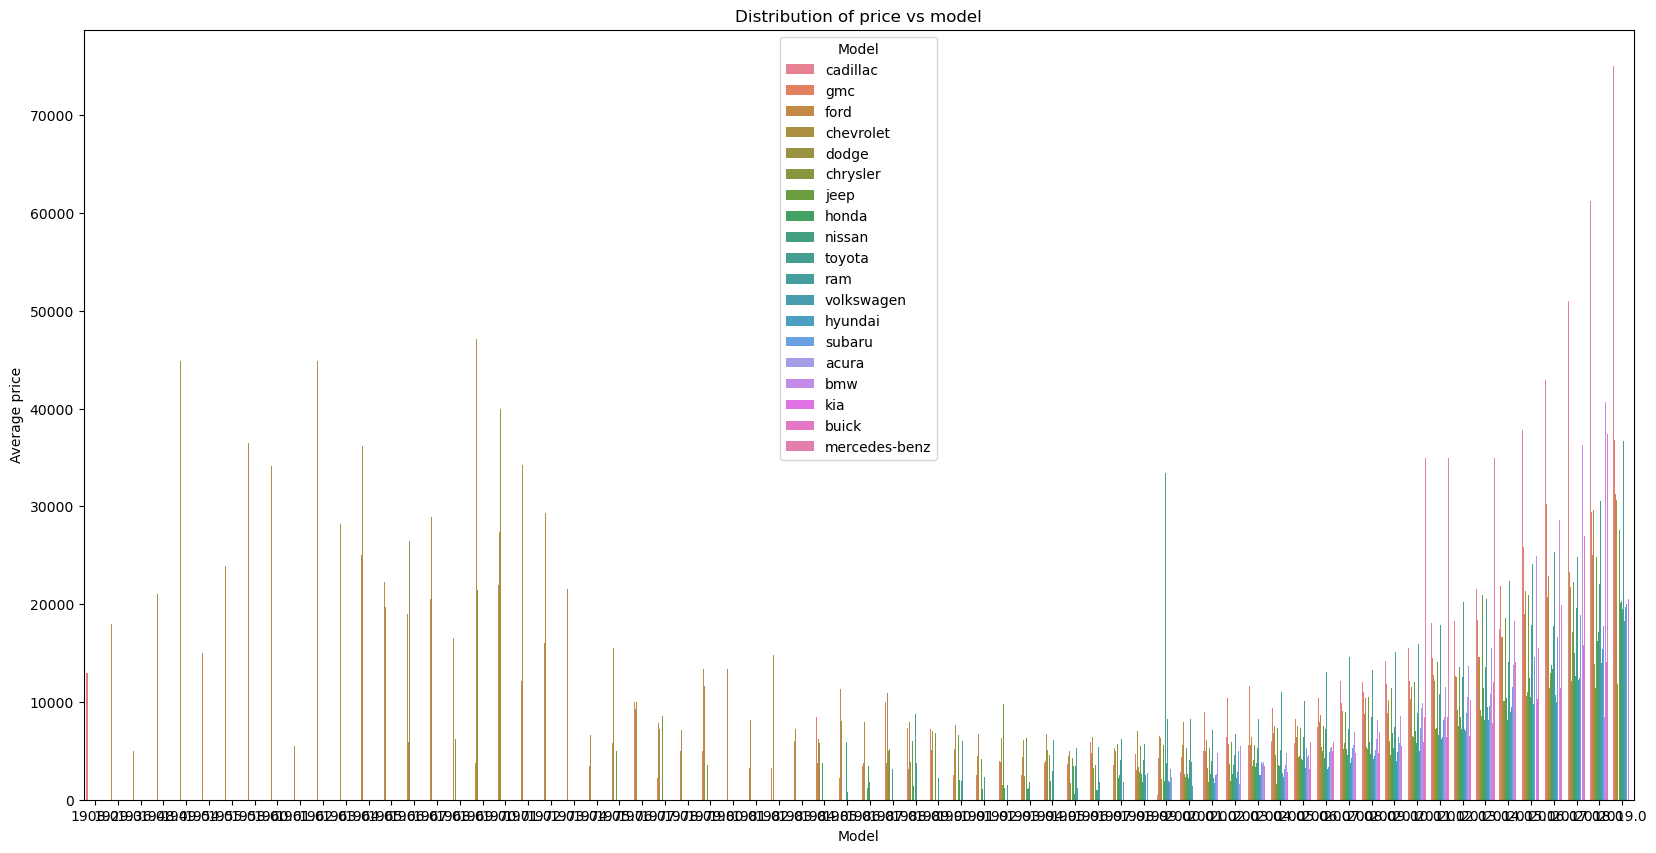

In [681]:

plt.figure(figsize=(20, 10))
sns.barplot(data=avg_car_value, x='model_year', y='avg_car_value', hue='manufacturer')
plt.title('Distribution of price vs model')
plt.xlabel('Model')
plt.ylabel('Average price')
plt.legend(title='Model')
plt.show()

### Comments
As we can see, in the marked of used cars the 5 top vehicle's manufacturer with the highest average price are: Cadillac, 